In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./Customer.csv")
df1 = pd.read_csv("./Transactions.csv")
df2 = pd.read_csv("./prod_cat_info.csv")

## 1. Merge the Dataset

In [4]:
customer_final = pd.merge(left=df,right=df1,left_on="customer_Id",right_on="cust_id",how="inner")
customer_final = pd.merge(left=customer_final,right=df2,left_on=["prod_subcat_code","prod_cat_code"],right_on=["prod_sub_cat_code","prod_cat_code"],how="inner")
customer_final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,Bags,1,Mens
2,268408,02-01-1970,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store,Bags,1,Mens
3,268408,02-01-1970,M,4.0,28810141075,268408,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop,Home and kitchen,10,Kitchen
4,268408,02-01-1970,M,4.0,64633435931,268408,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store,Footwear,4,Kids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,269626,27-12-1992,F,5.0,71369029396,269626,18-10-2011,12,6,1,638,66.990,704.990,e-Shop,Home and kitchen,12,Tools
23049,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,Clothing,3,Kids
23050,274308,29-12-1992,F,5.0,26208690928,274308,22-10-2012,1,2,2,898,188.580,1984.580,MBR,Footwear,1,Mens
23051,274308,29-12-1992,F,5.0,57358822237,274308,5/9/2012,1,2,4,876,367.920,3871.920,e-Shop,Footwear,1,Mens


#### The above code performs an inner join on 'customer_Id' and 'cust_id', followed by another inner join on 'prod_subcat_code' and 'prod_sub_cat_code'. The resulting dataset, Customer_Final, contains information about customers, transactions, and product hierarchy.

## 2. Summary Report
### a. Get the column name and data type

In [5]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_Id        23053 non-null  int64  
 1   DOB                23053 non-null  object 
 2   Gender             23044 non-null  object 
 3   city_code          23045 non-null  float64
 4   transaction_id     23053 non-null  int64  
 5   cust_id            23053 non-null  int64  
 6   tran_date          23053 non-null  object 
 7   prod_subcat_code   23053 non-null  int64  
 8   prod_cat_code      23053 non-null  int64  
 9   Qty                23053 non-null  int64  
 10  Rate               23053 non-null  int64  
 11  Tax                23053 non-null  float64
 12  total_amt          23053 non-null  float64
 13  Store_type         23053 non-null  object 
 14  prod_cat           23053 non-null  object 
 15  prod_sub_cat_code  23053 non-null  int64  
 16  prod_subcat        230

### b. Top/Bottom 10 Observation

In [6]:
customer_final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,Bags,1,Mens
2,268408,02-01-1970,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store,Bags,1,Mens
3,268408,02-01-1970,M,4.0,28810141075,268408,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop,Home and kitchen,10,Kitchen
4,268408,02-01-1970,M,4.0,64633435931,268408,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store,Footwear,4,Kids
5,268408,02-01-1970,M,4.0,56902862040,268408,30-01-2013,9,3,5,868,455.700,4795.700,e-Shop,Electronics,9,Cameras
6,268408,02-01-1970,M,4.0,56844530655,268408,14-10-2012,1,2,5,1175,616.875,6491.875,MBR,Footwear,1,Mens
7,268408,02-01-1970,M,4.0,19516063887,268408,7/9/2012,10,3,4,650,273.000,2873.000,e-Shop,Electronics,10,Audio and video
8,268408,02-01-1970,M,4.0,12644501524,268408,14-08-2012,4,4,3,321,101.115,1064.115,TeleShop,Bags,4,Women
9,268408,02-01-1970,M,4.0,63314547725,268408,26-04-2012,1,1,1,806,84.630,890.630,Flagship store,Clothing,1,Women


In [7]:
customer_final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
23043,270476,25-12-1992,F,3.0,78034405353,270476,13-08-2013,11,6,1,971,101.955,1072.955,TeleShop,Home and kitchen,11,Bath
23044,270476,25-12-1992,F,3.0,3359888057,270476,16-03-2013,10,3,4,361,151.620,1595.620,MBR,Electronics,10,Audio and video
23045,270476,25-12-1992,F,3.0,22883386455,270476,22-05-2012,4,2,4,898,377.160,3969.160,Flagship store,Footwear,4,Kids
23046,270476,25-12-1992,F,3.0,19725194268,270476,21-02-2012,4,4,4,618,259.560,2731.560,e-Shop,Bags,4,Women
23047,270476,25-12-1992,F,3.0,85475160771,270476,9/8/2011,5,3,5,1354,710.850,7480.850,Flagship store,Electronics,5,Computers
23048,269626,27-12-1992,F,5.0,71369029396,269626,18-10-2011,12,6,1,638,66.990,704.990,e-Shop,Home and kitchen,12,Tools
23049,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,Clothing,3,Kids
23050,274308,29-12-1992,F,5.0,26208690928,274308,22-10-2012,1,2,2,898,188.580,1984.580,MBR,Footwear,1,Mens
23051,274308,29-12-1992,F,5.0,57358822237,274308,5/9/2012,1,2,4,876,367.920,3871.920,e-Shop,Footwear,1,Mens
23052,274308,29-12-1992,F,5.0,58160544337,274308,4/7/2012,12,5,5,588,308.700,3248.700,e-Shop,Books,12,Academic


### c. Five Number Summary

In [8]:
customer_final.describe().loc[["min","max","25%","50%","75%","mean"],]

,customer_Id,city_code,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code
min,266783.000000,1.000000,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000
max,275265.000000,10.000000,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,12.000000
25%,268935.000000,3.000000,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,3.000000
50%,270980.000000,5.000000,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,5.000000
75%,273114.000000,8.000000,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,10.000000
mean,271021.746497,5.482534,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,6.149091


#### The 'Qty', 'Rate', and 'Tax' columns have negative values, potentially indicating returns or discounts. The 'Rate' column has a wide range, from -1499 to 1500.

### d. Frequency table for all category

#### Before finding the frequency of all categorical data first convert the DOB and tran_date to datetime

In [9]:
customer_final["DOB"] = pd.to_datetime(customer_final["DOB"],format="mixed")
customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"],format="mixed")

In [10]:
customer_final.select_dtypes(object).columns

Index(['Gender', 'Store_type', 'prod_cat', 'prod_subcat'], dtype='object')

#### d.1 Gender

In [11]:
customer_final["Gender"].value_counts()

Gender
M    11811
F    11233
Name: count, dtype: int64

#### d.2 Store_type

In [12]:
customer_final["Store_type"].value_counts()

Store_type
e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: count, dtype: int64

#### d.3 Prod_cat

In [13]:
customer_final["prod_cat"].value_counts()

prod_cat
Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: count, dtype: int64

#### d.4 Prod_subcat

In [14]:
customer_final["prod_subcat"].value_counts()

prod_subcat
Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Comics                 1031
Mobiles                1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
DIY                     989
Cameras                 985
Personal Appliances     972
Academic                967
Computers               958
Audio and video         952
Name: count, dtype: int64

## 3. Histograms for all continuous variables and frequency bars for categorical variables.

### 3.1. Histogram for continuous variable

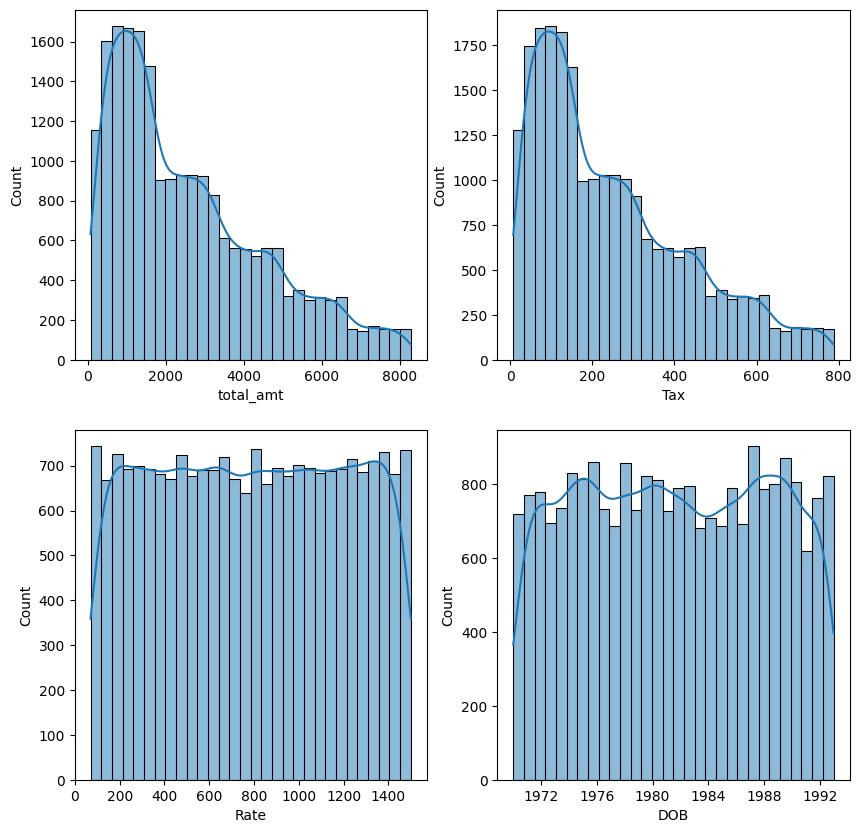

In [15]:
# 1. Total_amt
ttl_amt = customer_final[customer_final["total_amt"]>0]["total_amt"]

# 2. TAX
ttl_tax = customer_final[customer_final["Tax"]>0]["Tax"]

# 3. Rate
ttl_rate = customer_final[customer_final["Rate"]>0]["Rate"]

# 4. DOB
ttl_dob = customer_final["DOB"]

fig,ax =plt.subplots(nrows=2,ncols=2,figsize=(10,10))
sns.histplot(ax=ax[0,0],data=ttl_amt,kde=True,bins=30)
sns.histplot(ax=ax[0,1],data=ttl_tax,kde=True,bins=30)
sns.histplot(ax=ax[1,0],data=ttl_rate,kde=True,bins=30)
sns.histplot(ax=ax[1,1],data=ttl_dob,kde=True,bins=30)
plt.show()

### 3.2. Frequency bar for categorical

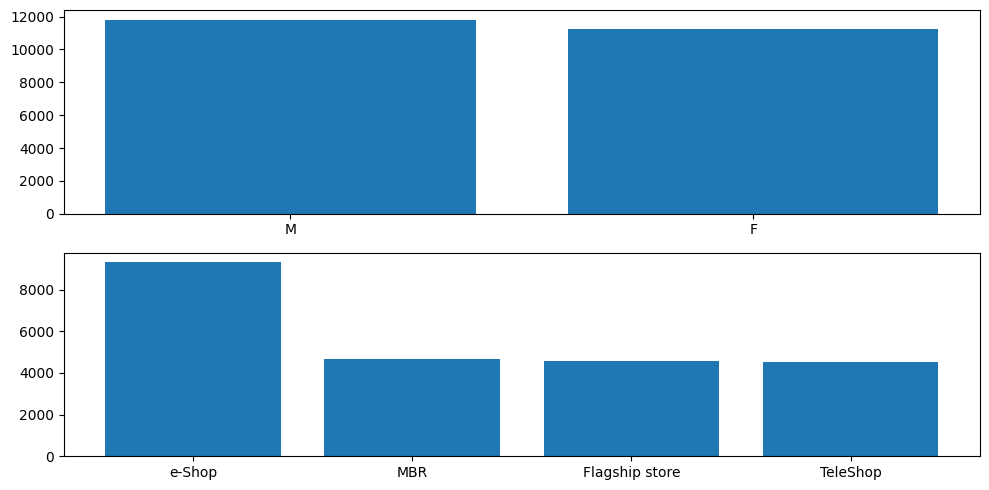

In [16]:
fig,ax = plt.subplots(ncols=1,nrows=2,figsize=(10,5))

a1 = customer_final["Gender"].value_counts().index
a2 = customer_final["Gender"].value_counts()
ax[0].bar(x=a1,height=a2)

b1 = customer_final["Store_type"].value_counts().index
b2 = customer_final["Store_type"].value_counts()
ax[1].bar(x=b1,height=b2)

plt.tight_layout()
plt.show()

## 4. Using customer_final merged datasest let's find out the
### 4.1. Time period of the available transcation data 

In [17]:
start_date = customer_final['tran_date'].dt.date.min()
end_date = customer_final['tran_date'].dt.date.max()

print(f"   Start Date: {start_date}")
print(f"   End Date: {end_date}")
print(f"   Time Period: {end_date - start_date}")

   Start Date: 2011-01-02
   End Date: 2014-12-02
   Time Period: 1430 days, 0:00:00


### 4.2. Count of Transactions with Negative Total Amount

In [18]:
count_negative_transactions = customer_final[customer_final["total_amt"]<0]["total_amt"].count()
print(f"Total Count: {count_negative_transactions}")

Total Count: 2177


## 5. Analyze which product categories are more popular among females vs male customers.

Gender               F     M
prod_cat                    
Bags               994  1004
Books             2949  3116
Clothing          1439  1518
Electronics       2328  2570
Footwear          1529  1469
Home and kitchen  1994  2134


<Figure size 1500x500 with 0 Axes>

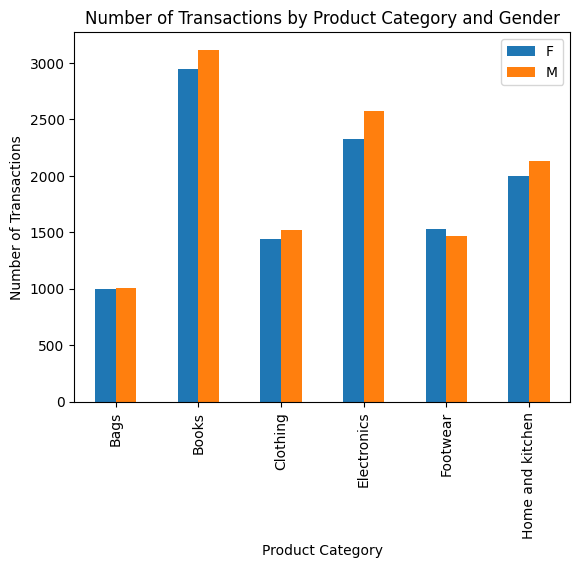

In [19]:
# Create the pivot table
gender_product = pd.pivot_table(customer_final, values='transaction_id', index='prod_cat', columns='Gender', aggfunc='count', fill_value=0)
print(gender_product)
# Get the unique values in the prod_cat column
categories = customer_final["prod_cat"].unique()

# Plot the bars
plt.figure(figsize=(15,5))
# plt.bar(categories, height=gender_product.loc[:, "F"], label='Female')
# plt.bar(categories, height=gender_product.loc[:, "M"], bottom=gender_product.loc[:, 'F'], label='Male')
gender_product.plot(kind="bar")

# Add labels and title
plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Product Category and Gender')
plt.legend()

# Show the plot
plt.show()

## 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [20]:
city_customer = customer_final.groupby("city_code").agg({"customer_Id":"count"}).sort_values(ascending=False,by="customer_Id")
city_customer

,customer_Id
city_code,
4.0,2422
3.0,2411
5.0,2360
7.0,2356
10.0,2333
8.0,2330
2.0,2270
1.0,2258
9.0,2178


### The city with city_code 4 has the maximum population

## 7. Which store type sells the maximum products by value and by quantity?

In [21]:
customer_final.columns

Index(['customer_Id', 'DOB', 'Gender', 'city_code', 'transaction_id',
       'cust_id', 'tran_date', 'prod_subcat_code', 'prod_cat_code', 'Qty',
       'Rate', 'Tax', 'total_amt', 'Store_type', 'prod_cat',
       'prod_sub_cat_code', 'prod_subcat'],
      dtype='object')

In [22]:
store_type = customer_final.groupby(["Store_type"]).agg({"Qty":sum,"total_amt":sum})
store_type

C:\Users\anura\AppData\Local\Temp\ipykernel_2556\2941288669.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  store_type = customer_final.groupby(["Store_type"]).agg({"Qty":sum,"total_amt":sum})
C:\Users\anura\AppData\Local\Temp\ipykernel_2556\2941288669.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  store_type = customer_final.groupby(["Store_type"]).agg({"Qty":sum,"total_amt":sum})


,Qty,total_amt
Store_type,,
Flagship store,11133,9.715688e+06
MBR,11194,9.674486e+06
TeleShop,10984,9.364781e+06
e-Shop,22763,1.982482e+07


### The e-shop strore type sold the maximum product with 56372 in quantity and 49096588.71 in amount.

## 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [23]:
flagship_amt = customer_final.groupby(["Store_type","prod_cat"]).agg({"total_amt":sum}).reset_index()
flagship_amt.loc[(flagship_amt["Store_type"]=="Flagship store") & ((flagship_amt["prod_cat"]=="Electronics") | (flagship_amt["prod_cat"]=="Clothing")),:]

C:\Users\anura\AppData\Local\Temp\ipykernel_2556\3561632892.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  flagship_amt = customer_final.groupby(["Store_type","prod_cat"]).agg({"total_amt":sum}).reset_index()


,Store_type,prod_cat,total_amt
2,Flagship store,Clothing,1194423.23
3,Flagship store,Electronics,2215136.04


## 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [24]:
ele_m = customer_final.loc[(customer_final["prod_cat"]=="Electronics") & (customer_final["Gender"]=="M"),:]
print(f"The amount earned from male through electronic purchase: {ele_m["total_amt"].sum()}")

The amount earned from male through electronic purchase: 5703109.425


## 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [25]:
# Step 1: Remove transactions with negative amounts
pst_tran = customer_final[customer_final["total_amt"]>0]

# Step 2: Find customers with more than 10 unique transactions
unq_c = pst_tran.groupby("customer_Id")["transaction_id"].nunique()

# Print the result
print("Number of customers with more than 10 unique transactions:", len(unq_c))

Number of customers with more than 10 unique transactions: 5506


## 11. For all customers aged between 25 - 35, find out:

###     a. What was the total amount spent for “Electronics” and “Books” product categories?

In [26]:
import datetime as dte
customer_final["AGE"] = (dte.datetime.now().year - customer_final["DOB"].dt.year)
customer_final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,AGE
0,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction,54
1,268408,1970-02-01,M,4.0,16197868036,268408,2013-12-16,1,4,-5,-210,110.250,-1160.250,Flagship store,Bags,1,Mens,54
2,268408,1970-02-01,M,4.0,16197868036,268408,2013-12-12,1,4,5,210,110.250,1160.250,Flagship store,Bags,1,Mens,54
3,268408,1970-02-01,M,4.0,28810141075,268408,2013-02-09,10,6,2,813,170.730,1796.730,TeleShop,Home and kitchen,10,Kitchen,54
4,268408,1970-02-01,M,4.0,64633435931,268408,2013-06-05,4,2,3,312,98.280,1034.280,Flagship store,Footwear,4,Kids,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,269626,1992-12-27,F,5.0,71369029396,269626,2011-10-18,12,6,1,638,66.990,704.990,e-Shop,Home and kitchen,12,Tools,32
23049,269626,1992-12-27,F,5.0,94134051896,269626,2011-07-07,3,1,3,1078,339.570,3573.570,MBR,Clothing,3,Kids,32
23050,274308,1992-12-29,F,5.0,26208690928,274308,2012-10-22,1,2,2,898,188.580,1984.580,MBR,Footwear,1,Mens,32
23051,274308,1992-12-29,F,5.0,57358822237,274308,2012-05-09,1,2,4,876,367.920,3871.920,e-Shop,Footwear,1,Mens,32


In [27]:
filter_data = customer_final[(customer_final["AGE"] >= 25) & (customer_final["AGE"] <= 35)]
tota_amt = filter_data.loc[(filter_data["prod_cat"]=="Electronics") | (filter_data["prod_cat"]=="Book"),:]
print(f"The total amount spent for “Electronics” and “Books” product categories: {tota_amt["total_amt"].sum()}")

The total amount spent for “Electronics” and “Books” product categories: 1819301.8350000002


### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [28]:
filter_data = customer_final[(customer_final["tran_date"]>="2014-01-01") & (customer_final["tran_date"] <= "2014-03-01")]
print(f"The total amount spent by customer between 1st Jan 2014 to 1st March 2014: {filter_data["total_amt"].sum()}")

The total amount spent by customer between 1st Jan 2014 to 1st March 2014: 1409397.665
